In [1]:
import scipy.io
import os
import glob
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearnex import patch_sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
def read_mat_file(filename):
    mat = scipy.io.loadmat(filename)
    # do something with the contents of the MATLAB file
    return mat

In [3]:
def read_mat_files(filenames):
    data = []
    for filename in filenames:
        data.append(read_mat_file(filename))
    return data

In [26]:
benign_data_labels = ["Q1", "Q2", "Q4", "Q5", "Q6", "Q7", "Q9", "Q10", "Q11", "Q13", "Q14", "Q16", "Q20", "Q21", "Q27", "Q34", "Q35", "Q37", "Q38", "Q40", "Q42", "Q43", "Q46", "Q49", "Q50", "Q52", "Q54", "Q56", "Q59", "Q62", "Q63", "Q65", "Q66", "Q67", "Q69"]
# scc_data_labels = ["Q3", "Q33","Q36","Q39","Q41","Q44","Q45","Q47","Q48", "Q51","Q53","Q55","Q57","Q58","Q61","Q64","Q68"] 
scc_data_labels = ["Q3"] 
# Use every 1/4 pixels so we still include every patient
# benign_data_labels = ["Q1", "Q2", "Q7", "Q9", "Q11", "Q13", "Q14", "Q16", "Q20"]
# Q4, Q5, Q6 give bad results for some reason
target = []
data = []

benign_dict = {}
normal_dict = {}


for label in scc_data_labels:
    data_lesion = read_mat_files(glob.glob("/Users/byronpetselis/Desktop/Cancer_Data/Yeoh/scc/" + label + "_*_lesion*"))
    print(data_lesion[2].keys())
    feat_15 = []
    feat_length = 0
    
    for feature in range(15):
        feat_name = list(data_lesion[feature].keys())[3]
        # '__header__', '__version__', '__globals__', 'tfast390m' are the key names
        feat_vals = data_lesion[feature][feat_name][0]
        # get 160x160 1D array associated with key name, [0] to get rid of nesting
        feat_15.append(feat_vals)
        # appends 160x160 1D array to array of 15 iteratively
        feat_length = len(feat_vals)
        # get actual length of 160x160 1D array
    
    feat_reshape = np.reshape(feat_15, (feat_length, 15))
    # reshapes (15, 160x160) to (160x160, 15) 2D array
    
#     target_app = [0] * feat_length
#     data.append(feat_reshape)
    
    for row in range(feat_length):
        if row % 2 == 0:
            target.append(1)
            data.append(feat_reshape[row])

for label in benign_data_labels:
    data_normal = read_mat_files(glob.glob("/Users/byronpetselis/Desktop/Cancer_Data/Yeoh/ben/" + label + "_*_lesion*"))
    feat_15 = []
    feat_length = 0
    
    for feature in range(15):
        feat_name = list(data_normal[feature].keys())[3]
        feat_vals = data_normal[feature][feat_name][0]
        feat_15.append(feat_vals)
        feat_length = len(feat_vals)
    
    feat_reshape = np.reshape(feat_15, (feat_length, 15))
        
    for row in range(feat_length):
        if row % 4 == 0:
            target.append(0)
            data.append(feat_reshape[row])
            
print(len(data))
print(f"SCC: {target.count(1)}")
print(f"Benign: {target.count(0)}")

dict_keys(['__header__', '__version__', '__globals__', 'LT500m'])
172083
SCC: 11085
Benign: 160998


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.3, random_state=209)
scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [27]:
cls = svm.SVC(kernel="linear", C=1, verbose=1)
# generate the model

In [28]:
start = time.time()
cls.fit(X_train, Y_train)
# train the model

SVC(C=1, kernel='linear', verbose=1)

In [29]:
pred = cls.predict(X_test)
end = time.time()
print(end - start)
print(np.count_nonzero(pred == 1))
# predict the response

64.05041599273682
260


In [30]:
print("accuracy:", metrics.accuracy_score(Y_test,pred))
print()
print("precision:", metrics.precision_score(Y_test,pred))
print()
print("recall:", metrics.recall_score(Y_test,pred))
print()
print(metrics.classification_report(Y_test,pred))

accuracy: 0.505674995562331

precision: 0.7115384615384616

recall: 0.00389867655736323

              precision    recall  f1-score   support

           0       0.51      1.00      0.67     48319
           1       0.71      0.00      0.01     47452

    accuracy                           0.51     95771
   macro avg       0.61      0.50      0.34     95771
weighted avg       0.61      0.51      0.34     95771



In [31]:
print("precision:", metrics.precision_score(Y_test,pred))

precision: 0.7115384615384616


In [32]:
print("recall:", metrics.recall_score(Y_test,pred))

recall: 0.00389867655736323


In [33]:
print(metrics.classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67     48319
           1       0.71      0.00      0.01     47452

    accuracy                           0.51     95771
   macro avg       0.61      0.50      0.34     95771
weighted avg       0.61      0.51      0.34     95771



In [23]:
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [ ]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=Y_train, s=8);
plt.ylim(0, 1)
plt.xlim(0, 1)

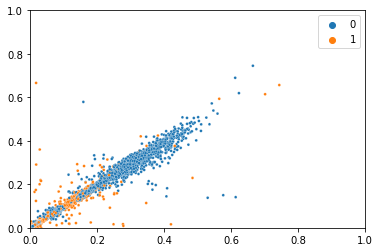

In [15]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=Y_test, s=8);
plt.ylim(0, 1)
plt.xlim(0, 1)
# Constructing a hyperplane using a formula.
w = cls.coef_[0]           # w consists of 2 elements
b = cls.intercept_[0]      # b consists of 1 element
x_points = np.linspace(0, 1)    # generating x-points from 0 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points

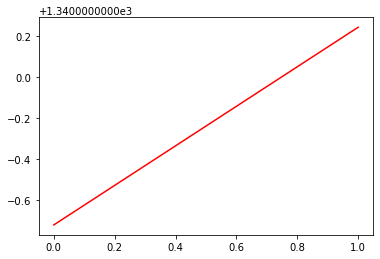

In [16]:
plt.plot(x_points, y_points, c='r');

ValueError: operands could not be broadcast together with shapes (50,2) (15,) 

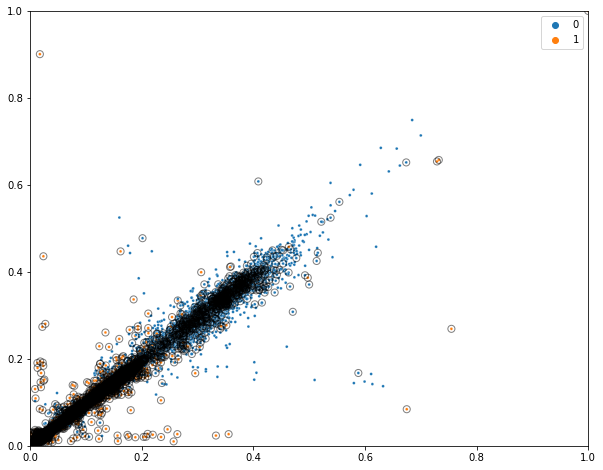

In [17]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=Y_train, 
                s=8);
plt.ylim(0, 1)
plt.xlim(0, 1)
# Constructing a hyperplane using a formula.
w = cls.coef_[0]           # w consists of 2 elements
b = cls.intercept_[0]      # b consists of 1 element
x_points = np.linspace(0, 1)    # generating x-points from 0 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(cls.support_vectors_[:, 0],
            cls.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=.5);
# Step 2 (unit-vector):
w_hat = cls.coef_[0] / (np.sqrt(np.sum(cls.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(cls.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)